In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf

In [3]:
features = pd.read_csv("/workspaces/bakery_sales_prediction/0_DataPreparation/features.csv")
pd.set_option('display.max_columns', None)
mapping = {1: 'brot', 2: 'brotchen', 3: 'croissant', 4: 'konditorei', 5: 'kuchen', 6: 'saisonbrot'}
features['Product'] = features['Warengruppe'].map(mapping)

features

,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,CPI,Unemployment,GDP,Wochentag,Wochenende,Monat,Schulferien,Temperatureclass_enc,Cloudclass_enc,Windclass_enc,Weather_After Rain,Weather_Fog,Weather_Other,Weather_Rain,Weather_Showers and Thunderstorms,Weather_Snow and Ice,Group_brot,Group_brotchen,Group_croissant,Group_konditorei,Group_kuchen,Group_saisonbrot,Product
0,2013-07-01,1,148.828353,6.0,17.8375,15.0,20.0,0,93.5,6.8,728.23,0,0,7,1,3,2,3,True,False,False,False,False,False,True,False,False,False,False,False,brot
1,2013-07-02,1,159.793757,3.0,17.3125,10.0,NaN,0,93.5,6.8,728.23,1,0,7,1,3,2,3,False,False,True,False,False,False,True,False,False,False,False,False,brot
2,2013-07-03,1,111.885594,7.0,21.0750,6.0,61.0,0,93.5,6.8,728.23,2,0,7,1,3,1,1,False,False,False,True,False,False,True,False,False,False,False,False,brot
3,2013-07-04,1,168.864941,7.0,18.8500,7.0,20.0,0,93.5,6.8,728.23,3,0,7,1,3,1,1,True,False,False,False,False,False,True,False,False,False,False,False,brot
4,2013-07-05,1,171.280754,5.0,19.9750,12.0,NaN,0,93.5,6.8,728.23,4,0,7,1,3,2,3,False,False,True,False,False,False,True,False,False,False,False,False,brot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,2018-12-22,6,NaN,8.0,4.3000,4.0,NaN,0,98.5,4.9,881.52,5,1,12,1,1,1,1,False,False,True,False,False,False,False,False,False,False,False,True,saisonbrot
11160,2018-12-23,6,NaN,7.0,6.4500,9.0,61.0,0,98.5,4.9,881.52,6,1,12,1,2,1,1,False,False,False,True,False,False,False,False,False,False,False,True,saisonbrot
11161,2018-12-24,6,NaN,7.0,2.5000,10.0,22.0,0,98.5,4.9,881.52,0,0,12,1,1,1,3,True,False,False,False,False,False,False,False,False,False,False,True,saisonbrot
11162,2018-12-27,6,NaN,7.0,7.1250,12.0,20.0,0,98.5,4.9,881.52,3,0,12,1,2,1,3,True,False,False,False,False,False,False,False,False,False,False,True,saisonbrot


In [4]:
features.iloc[:, 15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Temperatureclass_enc               11164 non-null  int64 
 1   Cloudclass_enc                     11164 non-null  int64 
 2   Windclass_enc                      11164 non-null  int64 
 3   Weather_After Rain                 11164 non-null  bool  
 4   Weather_Fog                        11164 non-null  bool  
 5   Weather_Other                      11164 non-null  bool  
 6   Weather_Rain                       11164 non-null  bool  
 7   Weather_Showers and Thunderstorms  11164 non-null  bool  
 8   Weather_Snow and Ice               11164 non-null  bool  
 9   Group_brot                         11164 non-null  bool  
 10  Group_brotchen                     11164 non-null  bool  
 11  Group_croissant                    11164 non-null  bool  
 12  Grou

In [5]:
train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'


train_data = features[features['Datum']<=train_end_date]
vali_data = features[(features['Datum']> train_end_date) & (features['Datum']<=validation_end_date)]
test_data = features[(features['Datum']> validation_end_date)]

In [6]:
numeric_features = {'Bewoelkung','Temperatur', 'Windgeschwindigkeit', 'CPI'}
categorical_features = {'Warengruppe', 'KielerWoche', 'Wettercode', 'Wochentag', 'Monat', 'Schulferien', 'Temperatureclass_enc', 'Cloudclass_enc', 'Windclass_enc'}

# Initial inspection

In [7]:
# Fit the linear regression model with each numerical feature and print the summary 
print("=== NUMERICAL FEATURES REGRESSION RESULTS ===")
results_summary = []

for feature in numeric_features:
    formula = f'Umsatz ~ {feature}'
    model = smf.ols(formula, data=train_data).fit()
    
    # Extract key statistics
    coef = model.params[feature]
    pvalue = model.pvalues[feature] 
    rsquared = model.rsquared
    
    results_summary.append({
        'Feature': feature,
        'Coefficient': coef,
        'P-value': pvalue,
        'R-squared': rsquared,
        'Significant': pvalue < 0.05
    })
    
    # Rank the results by R-squared
    results_summary.sort(key=lambda x: x['R-squared'], reverse=True)
      
# Display summary table
import pandas as pd
summary_df = pd.DataFrame(results_summary)
print(summary_df.to_string(index=False))

=== NUMERICAL FEATURES REGRESSION RESULTS ===
            Feature  Coefficient      P-value  R-squared  Significant
         Temperatur     4.554315 3.550235e-80   0.046902         True
         Bewoelkung    -4.860533 9.543335e-14   0.007382         True
Windgeschwindigkeit     0.407114 3.217067e-01   0.000131        False
                CPI    -1.711324 3.698440e-01   0.000107        False


In [8]:
# Fit the linear regression model with each categorical feature and print the summary
print("=== CATEGORICAL FEATURES REGRESSION RESULTS ===")
categorical_results = []

for feature in categorical_features:
    formula = f'Umsatz ~ C({feature})'
    model = smf.ols(formula, data=train_data).fit()
    
    categorical_results.append({
        'Feature': feature,
        'R_squared': round(model.rsquared, 4),
        'F_pvalue': f"{model.f_pvalue:.2e}" if model.f_pvalue < 0.001 else round(model.f_pvalue, 4),
        'p-value': model.f_pvalue,
        'Significant': 'Yes' if model.f_pvalue < 0.05 else 'No',
        'Categories': train_data[feature].nunique(),
        'AIC': round(model.aic, 2)
    })
    # Rank the results by R-squared
    categorical_results.sort(key=lambda x: x['R_squared'], reverse=True)
    
    
# Display as a clean table
import pandas as pd
results_df = pd.DataFrame(categorical_results)
print(results_df.to_string(index=False))

=== CATEGORICAL FEATURES REGRESSION RESULTS ===


             Feature  R_squared  F_pvalue       p-value Significant  Categories      AIC
         Warengruppe     0.6506  0.00e+00  0.000000e+00         Yes           6 88261.79
               Monat     0.0717 1.94e-112 1.944826e-112         Yes          12 95594.25
Temperatureclass_enc     0.0462  1.87e-75  1.868543e-75         Yes           5 95783.35
         Schulferien     0.0297  4.31e-51  4.306830e-51         Yes           2 95905.91
           Wochentag     0.0263  2.79e-40  2.794000e-40         Yes           7 95942.70
          Wettercode     0.0112  2.80e-06  2.799386e-06         Yes          20 68941.22
      Cloudclass_enc     0.0085  1.17e-14  1.165172e-14         Yes           3 96069.85
         KielerWoche     0.0029  3.42e-06  3.418466e-06         Yes           2 96110.47
       Windclass_enc     0.0010    0.0635  6.347340e-02          No           4 96128.76


# Multilinear regression

### Fixed feature = Product group

In [9]:
# Define your categorical fixed feature
def fit_categorical(fixed_feature, train_data):
    print(f"Fixed categorical feature: {fixed_feature}")
    print(f"Number of categories in {fixed_feature}: {train_data[fixed_feature].nunique()}")
    print(f"Categories: {sorted(train_data[fixed_feature].unique())}")
    print()

    #1: Categorical fixed feature + numerical features
    numerical_results = []

    for feature in numeric_features:
        # Formula: categorical fixed feature + numerical feature
        formula = f'Umsatz ~ C({fixed_feature}) + {feature}'
        model = smf.ols(formula, data=train_data).fit()
        
        # Extract statistics
        rsquared = model.rsquared
        adj_rsquared = model.rsquared_adj
        f_pvalue = model.f_pvalue
        
        # Get numerical feature coefficient and p-value
        num_coef = model.params[feature]
        num_pval = model.pvalues[feature]
        
        # Count significant categorical coefficients
        cat_params = [p for p in model.params.index if fixed_feature in p and p != 'Intercept']
        sig_categories = sum(1 for p in cat_params if model.pvalues[p] < 0.05)
        
        
        numerical_results.append({
            'Model': f'C({fixed_feature}) + {feature}',
            'Other_feature': feature,
            'R_squared': rsquared,
            'Adj_R_squared': adj_rsquared,
            'F_pvalue': f_pvalue,
            'Num_coef': num_coef,
            'Num_pval': num_pval,
            'Num_significant': num_pval < 0.05,
            'Sig_categories': sig_categories,
            'Total_categories': len(cat_params)
        })

    #1: Categorical fixed feature + categorical features  
    categorical_results = []

    for feature in categorical_features:
        if feature != fixed_feature:  # Skip the same feature
            # Formula: categorical fixed feature + another categorical feature
            formula = f'Umsatz ~ C({fixed_feature}) + C({feature})'
            model = smf.ols(formula, data=train_data).fit()
            
            # Extract statistics
            rsquared = model.rsquared
            adj_rsquared = model.rsquared_adj
            f_pvalue = model.f_pvalue
            
            # Count parameters for each categorical feature
            fixed_params = [p for p in model.params.index if fixed_feature in p and p != 'Intercept']
            other_params = [p for p in model.params.index if feature in p and p != 'Intercept']
            
            # Count significant parameters
            sig_fixed = sum(1 for p in fixed_params if model.pvalues[p] < 0.05)
            sig_other = sum(1 for p in other_params if model.pvalues[p] < 0.05)
            
            
            categorical_results.append({
                'Model': f'C({fixed_feature}) + C({feature})',
                'Other_feature': feature,
                'R_squared': rsquared,
                'Adj_R_squared': adj_rsquared,
                'F_pvalue': f_pvalue,
                'Other_categories': train_data[feature].nunique(),
                'Sig_fixed': sig_fixed,
                'Total_fixed': len(fixed_params),
                'Sig_other': sig_other,
                'Total_other': len(other_params)
            })
            
    print("=== SUMMARY: CATEGORICAL FIXED + NUMERICAL ===")
    if numerical_results:
        import pandas as pd
        num_df = pd.DataFrame(numerical_results)
        display_cols = ['Other_feature', 'R_squared', 'Adj_R_squared', 'Num_significant', 'Sig_categories']
        num_summary = num_df[display_cols].sort_values('R_squared', ascending=False)
        print(num_summary.to_string(index=False))

    print(f"\n=== SUMMARY: CATEGORICAL FIXED + CATEGORICAL ===")
    if categorical_results:
        cat_df = pd.DataFrame(categorical_results)
        display_cols = ['Other_feature', 'R_squared', 'Adj_R_squared', 'Other_categories']
        cat_summary = cat_df[display_cols].sort_values('R_squared', ascending=False)
        print(cat_summary.to_string(index=False))


In [10]:
fit_categorical('Warengruppe', train_data)

Fixed categorical feature: Warengruppe
Number of categories in Warengruppe: 6
Categories: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

=== SUMMARY: CATEGORICAL FIXED + NUMERICAL ===
      Other_feature  R_squared  Adj_R_squared  Num_significant  Sig_categories
         Temperatur   0.688020       0.687769             True               5
         Bewoelkung   0.656009       0.655733             True               5
                CPI   0.650931       0.650651             True               5
Windgeschwindigkeit   0.650405       0.650125            False               5

=== SUMMARY: CATEGORICAL FIXED + CATEGORICAL ===
       Other_feature  R_squared  Adj_R_squared  Other_categories
               Monat   0.708803       0.708179                12
Temperatureclass_enc   0.687639       0.687263                 5
           Wochentag   0.677253       0.676779                 7
         Schulferien   0.676699       0.676440                 2
      Cloudcl

### All features

In [11]:
# Fit the linear regression model with all numerical features
formula = 'Umsatz ~ ' + ' + '.join(numeric_features)
model = smf.ols(formula, data=train_data).fit()
# Modellzusammenfassung ausgeben
print("\n=== ALL NUMERICAL FEATURES REGRESSION RESULTS ===")
print(model.summary())



=== ALL NUMERICAL FEATURES REGRESSION RESULTS ===
                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           4.31e-84
Time:                        10:06:44   Log-Likelihood:                -47828.
No. Observations:                7487   AIC:                         9.567e+04
Df Residuals:                    7482   BIC:                         9.570e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [12]:
# Fit the linear regression model with all categorical features
formula = 'Umsatz ~ ' + ' + '.join([f'C({feature})' for feature in categorical_features])
model = smf.ols(formula, data=train_data).fit()
# Modellzusammenfassung ausgeben
print("\n=== ALL CATEGORICAL FEATURES REGRESSION RESULTS ===")
print(model.summary())


=== ALL CATEGORICAL FEATURES REGRESSION RESULTS ===
                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     301.0
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:06:44   Log-Likelihood:                -30908.
No. Observations:                5399   AIC:                         6.192e+04
Df Residuals:                    5349   BIC:                         6.225e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------


=== ALL FEATURES REGRESSION RESULTS ===
                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     285.7
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:06:45   Log-Likelihood:                -30854.
No. Observations:                5399   AIC:                         6.182e+04
Df Residuals:                    5345   BIC:                         6.217e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

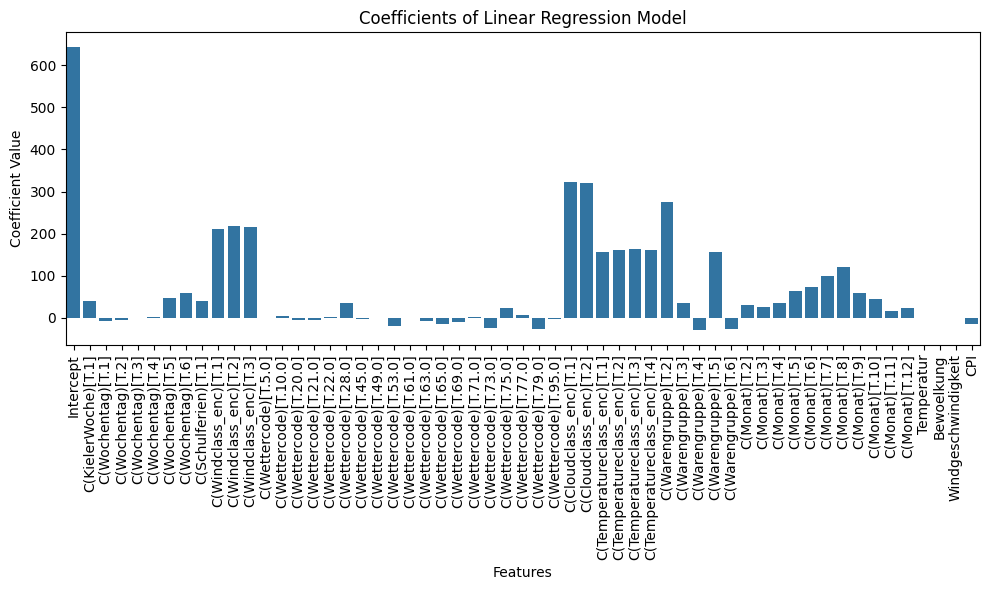

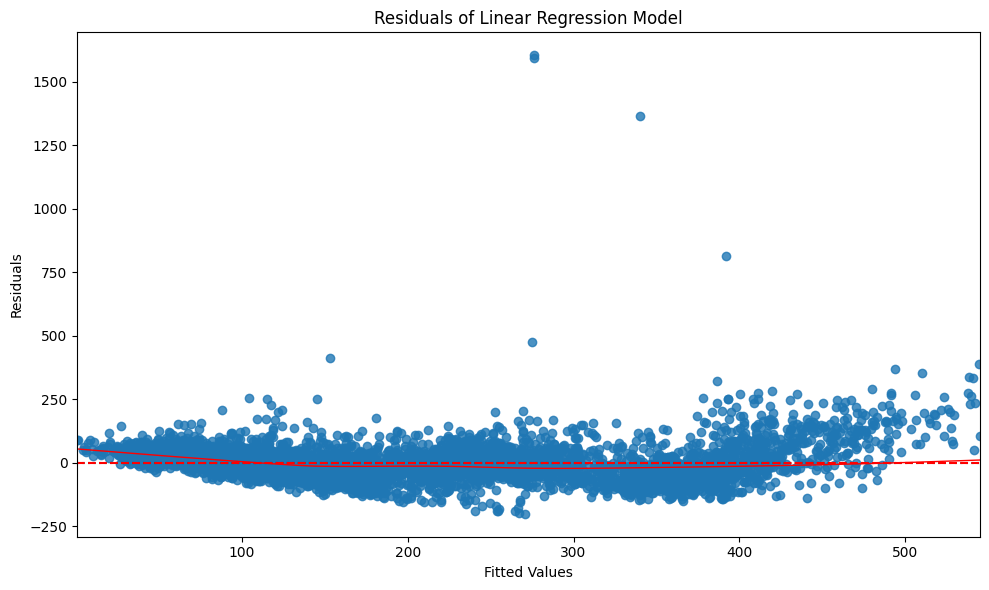

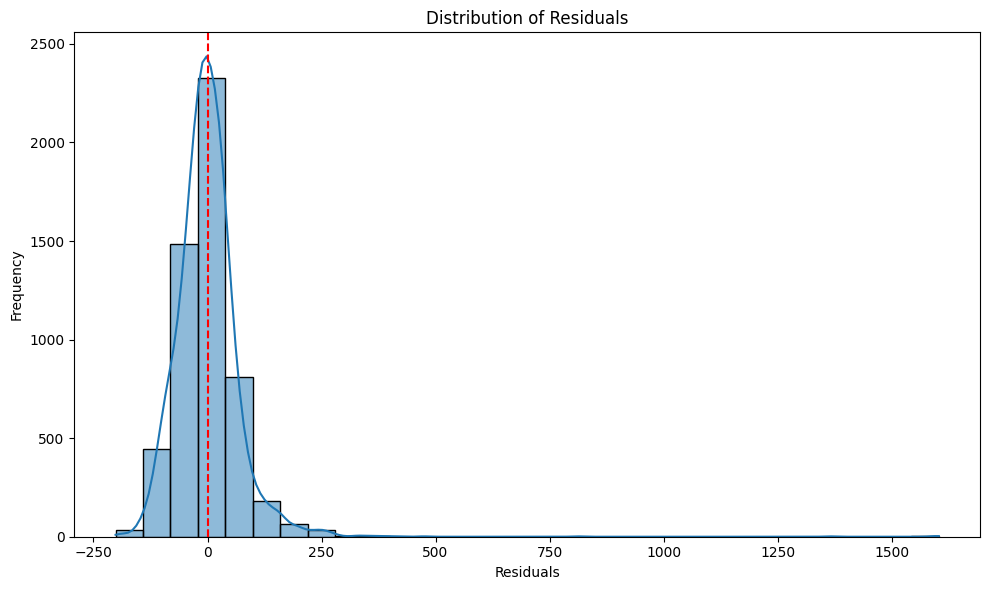

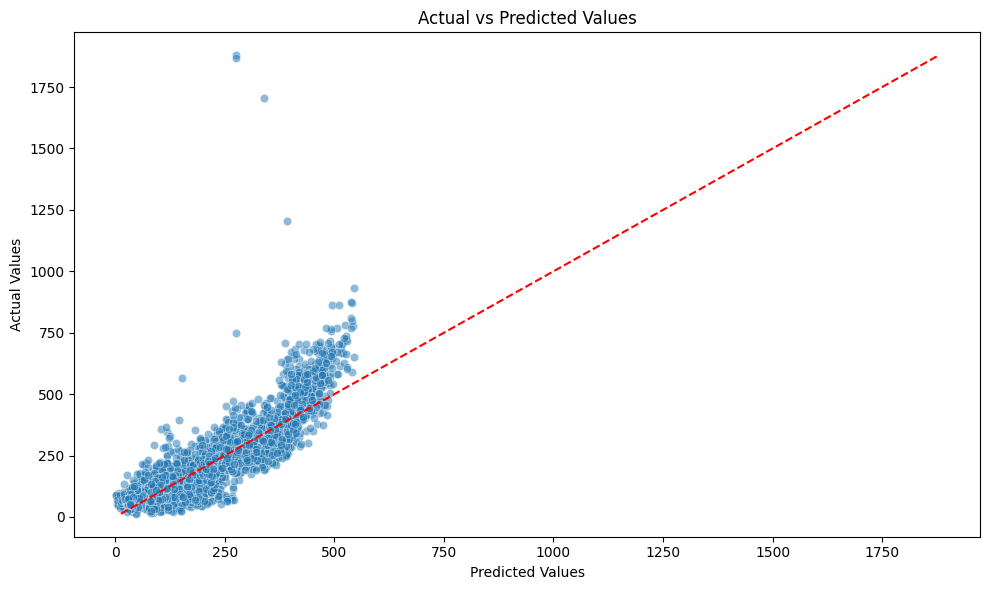

In [13]:
# Fit the linear regression model with all features
formula = 'Umsatz ~ ' + ' + '.join([f'C({f})' for f in categorical_features]) + ' + ' + ' + '.join(numeric_features)
model = smf.ols(formula, data=train_data).fit()
# Modellzusammenfassung ausgeben
print("\n=== ALL FEATURES REGRESSION RESULTS ===")
print(model.summary())
# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=model.params.index, y=model.params.values)
plt.xticks(rotation=90)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()
# Visualize the residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(0, linestyle='--', color='red')
plt.tight_layout()
plt.show()
# Visualize the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, linestyle='--', color='red')
plt.tight_layout()
plt.show()
# Visualize the relationship between actual and predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=train_data['Umsatz'], alpha=0.5)
plt.plot([train_data['Umsatz'].min(), train_data['Umsatz'].max()], 
         [train_data['Umsatz'].min(), train_data['Umsatz'].max()], 
         color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.tight_layout()
plt.show()

## Evaluate best and worst combination

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from itertools import combinations, chain
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

In [15]:
df = train_data.copy() 

In [16]:
class AdjustedR2ModelSelector:
    def __init__(self, target_col='Umsatz'):
        self.target_col = target_col
        self.numeric_features = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'CPI']
        self.categorical_features = ['Product'
                                     , 'KielerWoche', 'Wettercode', 'Wochentag', 
                                   'Monat', 'Schulferien', 'Temperatureclass_enc', 
                                   'Cloudclass_enc', 'Windclass_enc'
                                   ]
        self.all_features = self.categorical_features + self.numeric_features
        self.all_results = []
        
    def prepare_data(self, df):
        """Prepare data by encoding categorical variables and scaling numeric ones"""
        df_processed = df.copy()
        
        # Encode categorical variables
        self.label_encoders = {}
        for col in self.categorical_features:
            if col in df_processed.columns:
                le = LabelEncoder()
                df_processed[col] = le.fit_transform(df_processed[col].astype(str))
                self.label_encoders[col] = le
        
        # Scale numeric features
        self.scaler = StandardScaler()
        numeric_cols_present = [col for col in self.numeric_features if col in df_processed.columns]
        if numeric_cols_present:
            df_processed[numeric_cols_present] = self.scaler.fit_transform(df_processed[numeric_cols_present])
        
        return df_processed
    
    def calculate_adjusted_r2(self, r2, n_samples, n_features):
        """Calculate adjusted R-squared"""
        if n_samples <= n_features + 1:
            return -np.inf  # Avoid division by zero or negative denominator
        
        adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
        return adjusted_r2
    

    def evaluate_model(self, df, features):
        """Evaluate model using statsmodels with formula interface"""
        if not all(feature in df.columns for feature in features):
            return None

        formula_terms = []
        for f in features:
            if f in self.categorical_features:
                formula_terms.append(f'C({f})')
            else:
                formula_terms.append(f)

        formula = f"{self.target_col} ~ " + " + ".join(formula_terms)

        try:
            model = smf.ols(formula, data=df).fit()
            r2 = model.rsquared
            adjusted_r2 = model.rsquared_adj
            mse = mean_squared_error(model.model.endog, model.fittedvalues)
            rmse = np.sqrt(mse)
            
            return {
                'features': features,
                'n_features': len(features),
                'r2_score': r2,
                'adjusted_r2': adjusted_r2,
                'mse': mse,
                'rmse': rmse,
                'n_samples': model.nobs,
                'coefficients': model.params.to_dict(),
                'intercept': model.params.get('Intercept', 0),
                'model': model
            }
        except Exception as e:
            return None
    
    def generate_all_combinations(self, available_features, max_features=None):
        """Generate all possible feature combinations"""
        if max_features is None:
            max_features = len(available_features)
        
        all_combinations = []
        
        # Generate combinations of size 1 to max_features
        for r in range(1, min(max_features + 1, len(available_features) + 1)):
            all_combinations.extend(combinations(available_features, r))
        
        return all_combinations
    
    def evaluate_all_models(self, df, max_features=None, progress_interval=100):
        """Evaluate all possible feature combinations"""
        print("Preparing data...")
        df_processed = self.prepare_data(df)
        
        # Get available features
        available_features = [f for f in self.all_features if f in df_processed.columns]
        print(f"Available features: {len(available_features)}")
        
        # Generate all combinations
        print("Generating feature combinations...")
        all_combinations = self.generate_all_combinations(available_features, max_features)
        total_combinations = len(all_combinations)
        print(f"Total combinations to evaluate: {total_combinations}")
        
        # Evaluate all combinations
        print("Evaluating models...")
        self.all_results = []
        
        for i, combo in enumerate(all_combinations):
            if (i + 1) % progress_interval == 0:
                print(f"Progress: {i + 1}/{total_combinations} ({(i + 1)/total_combinations*100:.1f}%)")
            
            # Convert tuple to list for consistent handling
            feature_list = list(combo)
            result = self.evaluate_model(df_processed, feature_list)
            if result and not np.isnan(result['adjusted_r2']) and not np.isinf(result['adjusted_r2']):
                self.all_results.append(result)
        
        print(f"Successfully evaluated {len(self.all_results)} models")
        
        # Sort by adjusted R-squared
        self.all_results.sort(key=lambda x: x['adjusted_r2'], reverse=True)
        
        return self.all_results
    
    def get_top_bottom_models(self, n=3):
        """Get top n and bottom n models by adjusted R-squared"""
        if len(self.all_results) < 2 * n:
            print(f"Warning: Only {len(self.all_results)} models available, showing all")
            return self.all_results, []
        
        top_models = self.all_results[:n]
        bottom_models = self.all_results[-n:]
        
        return top_models, bottom_models
    
    def print_model_details(self, model_result, rank_type=""):
        """Print detailed information about a model"""
        print(f"\n{rank_type}")
        print("-" * 60)
        print(f"Features ({model_result['n_features']}): {model_result['features']}")
        print(f"Adjusted R²: {model_result['adjusted_r2']:.6f}")
        print(f"R²: {model_result['r2_score']:.6f}")
        print(f"RMSE: {model_result['rmse']:.4f}")
        print(f"Sample size: {model_result['n_samples']}")
        print(f"Intercept: {model_result['intercept']:.4f}")
        print("\nCoefficients:")
        for feature, coef in model_result['coefficients'].items():
            print(f"  {feature}: {coef:.6f}")
    
    def print_summary(self, top_models, bottom_models):
        """Print summary of top and bottom models"""
        print("\n" + "="*80)
        print("TOP 3 MODELS (Highest Adjusted R-squared)")
        print("="*80)
        
        for i, model in enumerate(top_models, 1):
            self.print_model_details(model, f"Rank #{i} (Highest)")
        
        print("\n" + "="*80)
        print("BOTTOM 3 MODELS (Lowest Adjusted R-squared)")
        print("="*80)
        
        for i, model in enumerate(bottom_models, 1):
            rank = len(self.all_results) - len(bottom_models) + i
            self.print_model_details(model, f"Rank #{rank} (Lowest)")
    
    def create_comparison_dataframe(self, top_models, bottom_models):
        """Create a comparison DataFrame"""
        all_models = top_models + bottom_models
        
        comparison_data = []
        for i, model in enumerate(all_models):
            rank_type = "Top" if i < len(top_models) else "Bottom"
            comparison_data.append({
                'Rank_Type': rank_type,
                'Features': ', '.join(model['features']),
                'N_Features': model['n_features'],
                'Adjusted_R2': model['adjusted_r2'],
                'R2': model['r2_score'],
                'RMSE': model['rmse'],
                'N_Samples': model['n_samples']
            })
        
        return pd.DataFrame(comparison_data)
    
    def run_analysis(self, df, max_features=None, n_models=3):
        """Run complete analysis to find top and bottom models"""
        print("Starting Linear Regression Model Analysis")
        print("="*60)
        
        # Evaluate all models
        all_results = self.evaluate_all_models(df, max_features)
        
        if not all_results:
            print("No valid models found!")
            return None, None, None
        
        # Get top and bottom models
        top_models, bottom_models = self.get_top_bottom_models(n_models)
        
        # Print summary
        self.print_summary(top_models, bottom_models)
        
        # Create comparison DataFrame
        comparison_df = self.create_comparison_dataframe(top_models, bottom_models)
        
        print(f"\n\nTotal models evaluated: {len(all_results)}")
        print(f"Adjusted R² range: {all_results[0]['adjusted_r2']:.6f} to {all_results[-1]['adjusted_r2']:.6f}")
        
        return top_models, bottom_models, comparison_df

# Example usage:
if __name__ == "__main__":
    # Example of how to use the AdjustedR2ModelSelector
    
    # Assuming you have a DataFrame 'df' with your data
    # df = pd.read_csv('your_data.csv')
    
    # Initialize the selector
    selector = AdjustedR2ModelSelector(target_col='Umsatz')
    
    # Run the complete analysis
    # This will evaluate ALL possible feature combinations (can be computationally intensive)
    # top_models, bottom_models, comparison_df = selector.run_analysis(df, max_features=6)
    
    # For faster execution with fewer features:
    # top_models, bottom_models, comparison_df = selector.run_analysis(df, max_features=4)
    
    # Access individual model details:
    # best_model = top_models[0]
    # worst_model = bottom_models[0]
    
    print("Analysis ready! Use selector.run_analysis(df) to start.")

Analysis ready! Use selector.run_analysis(df) to start.


In [17]:
selector = AdjustedR2ModelSelector(target_col='Umsatz')

In [18]:
top_models, bottom_models, comparison_df = selector.run_analysis(df, max_features=4)

Starting Linear Regression Model Analysis
Preparing data...
Available features: 13
Generating feature combinations...
Total combinations to evaluate: 1092
Evaluating models...
Progress: 100/1092 (9.2%)
Progress: 200/1092 (18.3%)
Progress: 300/1092 (27.5%)
Progress: 400/1092 (36.6%)
Progress: 500/1092 (45.8%)
Progress: 600/1092 (54.9%)
Progress: 700/1092 (64.1%)
Progress: 800/1092 (73.3%)
Progress: 900/1092 (82.4%)
Progress: 1000/1092 (91.6%)
Successfully evaluated 1092 models

TOP 3 MODELS (Highest Adjusted R-squared)

Rank #1 (Highest)
------------------------------------------------------------
Features (4): ['Product', 'Wochentag', 'Monat', 'Schulferien']
Adjusted R²: 0.742705
R²: 0.743495
RMSE: 74.8347
Sample size: 7493.0
Intercept: 58.6656

Coefficients:
  Intercept: 58.665567
  C(Product)[T.1]: 289.258962
  C(Product)[T.2]: 42.807639
  C(Product)[T.3]: -32.646331
  C(Product)[T.4]: 159.554602
  C(Product)[T.5]: -24.551354
  C(Wochentag)[T.1]: -5.743930
  C(Wochentag)[T.2]: -5.773

In [19]:
# Access the best and worst models
best_model = top_models[0]  # Highest adjusted R²
worst_model = bottom_models[0]  # Lowest adjusted R²
# View comparison table
print(comparison_df)

  Rank_Type                                Features  N_Features  Adjusted_R2  \
0       Top  Product, Wochentag, Monat, Schulferien           4     0.742705   
1       Top          Product, Wochentag, Monat, CPI           4     0.741077   
2       Top  Product, KielerWoche, Wochentag, Monat           4     0.735604   
3    Bottom                     Windgeschwindigkeit           1    -0.000002   
4    Bottom                Windgeschwindigkeit, CPI           2    -0.000026   
5    Bottom                                     CPI           1    -0.000026   

         R2        RMSE  N_Samples  
0  0.743495   74.834662     7493.0  
1  0.741872   75.071078     7493.0  
2  0.736416   75.860314     7493.0  
3  0.000131  147.751524     7487.0  
4  0.000241  147.743398     7487.0  
5  0.000107  147.751399     7493.0  


### Code check

In [20]:
# Fit the linear regression model
model = smf.ols('Umsatz ~ C(Warengruppe)', data=selector.prepare_data(df)).fit()
# Modellzusammenfassung ausgeben
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2788.
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        10:08:21   Log-Likelihood:                -44125.
No. Observations:                7493   AIC:                         8.826e+04
Df Residuals:                    7487   BIC:                         8.830e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             121.3353    

In [21]:
selector.evaluate_model(df, ['Product'])

{'features': ['Product'],
 'n_features': 1,
 'r2_score': np.float64(0.650557429687203),
 'adjusted_r2': np.float64(0.6503240634722218),
 'mse': 7629.316696617574,
 'rmse': np.float64(87.34595981851464),
 'n_samples': 7493.0,
 'coefficients': {'Intercept': 121.33532196646465,
  'C(Product)[T.brotchen]': 289.25896153732344,
  'C(Product)[T.croissant]': 42.80763871906468,
  'C(Product)[T.konditorei]': -33.00883269999051,
  'C(Product)[T.kuchen]': 159.55460240813107,
  'C(Product)[T.saisonbrot]': -54.36111705124619},
 'intercept': np.float64(121.33532196646465),
 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x70887d0bb200>}